# Oasis Infobyte 


# Task 1.  Iris Flower Classification

In [135]:
import zipfile

In [8]:
with zipfile.ZipFile('iris.zip','r') as zip_ref:
    zip_ref.extractall()

Importing Libraries

In [37]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

Importing Datasets

In [13]:
df = pd.read_csv('IRIS.csv')

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [16]:
df.tail()


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Data Exploration

In [18]:
df.shape


(150, 5)

In [19]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [20]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [21]:
data = df.groupby('species')

In [22]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [23]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
print("unique number of values in dataset species:",df["species"].nunique())

unique number of values in dataset species: 3


In [40]:
print("unique species in iris dataset:",df["species"].unique())

unique species in iris dataset: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# Exploring Data Analysis

Data Visualization

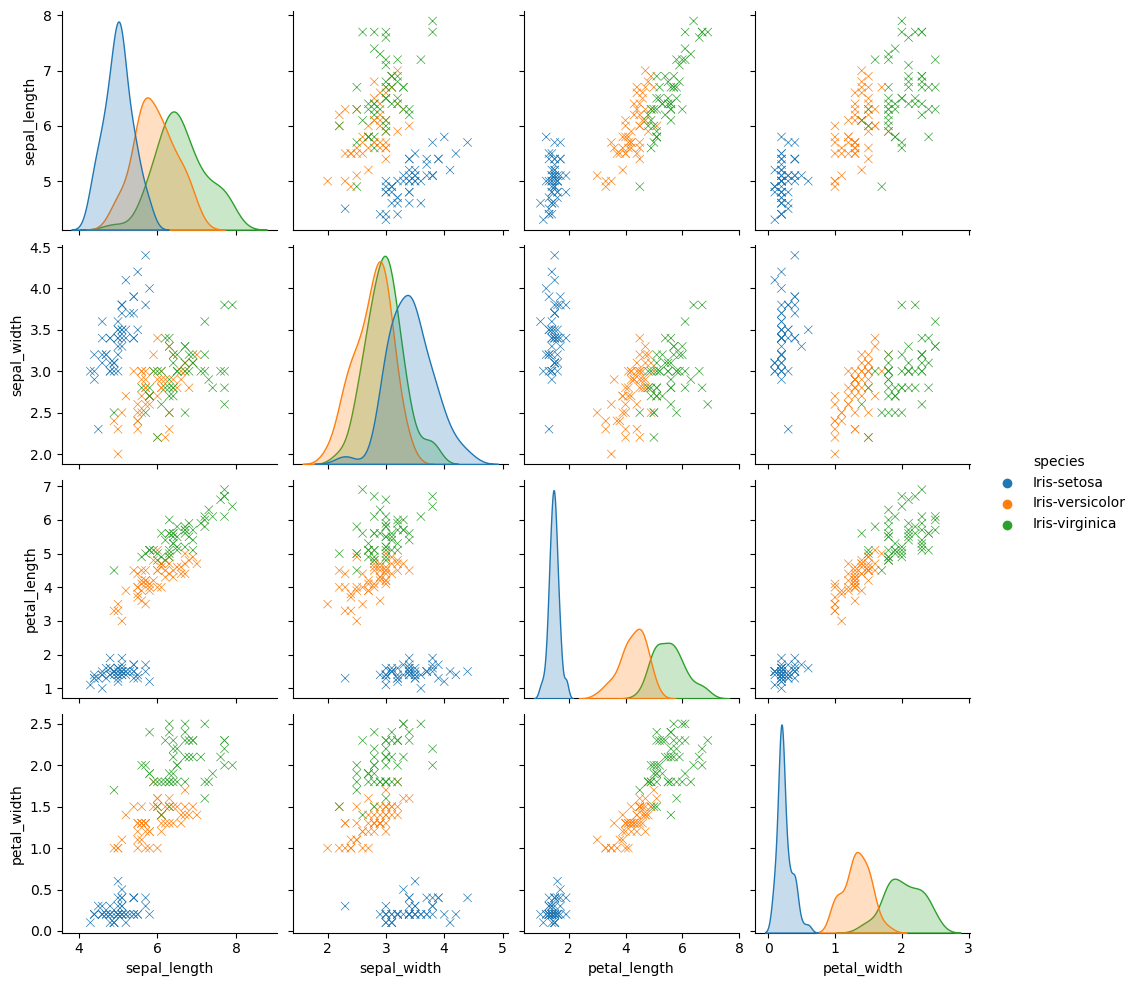

In [41]:
sns.pairplot(df, hue="species", markers="x")
plt.show()


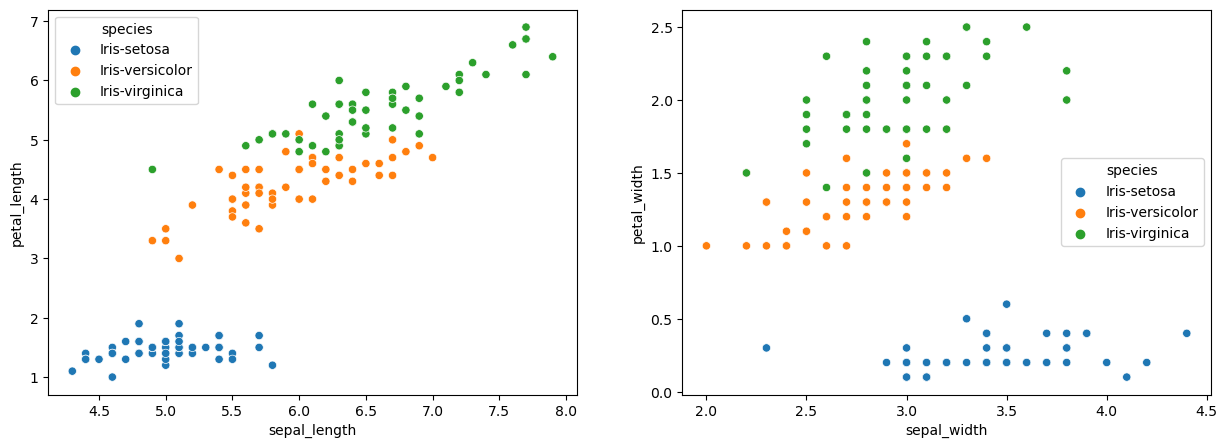

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='sepal_length', y='petal_length', data=df, hue='species')

plt.subplot(1,2,2)
sns.scatterplot(x='sepal_width', y='petal_width', data=df, hue='species')

plt.show()

In [46]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


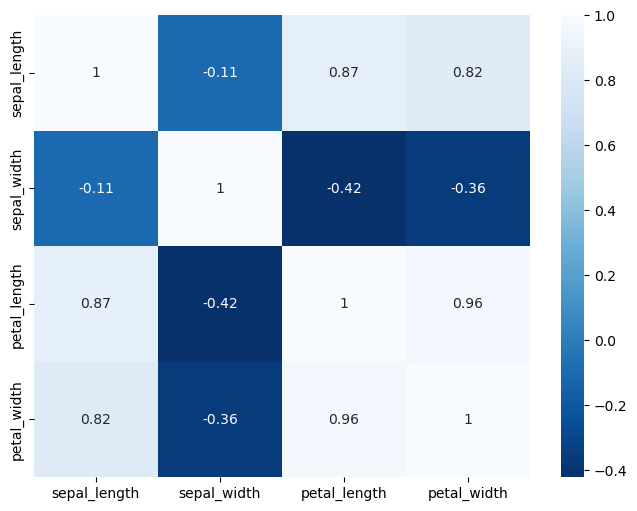

In [62]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot= True,cmap = "Blues_r")
plt.show()

Scatterplot for petal length and petal width

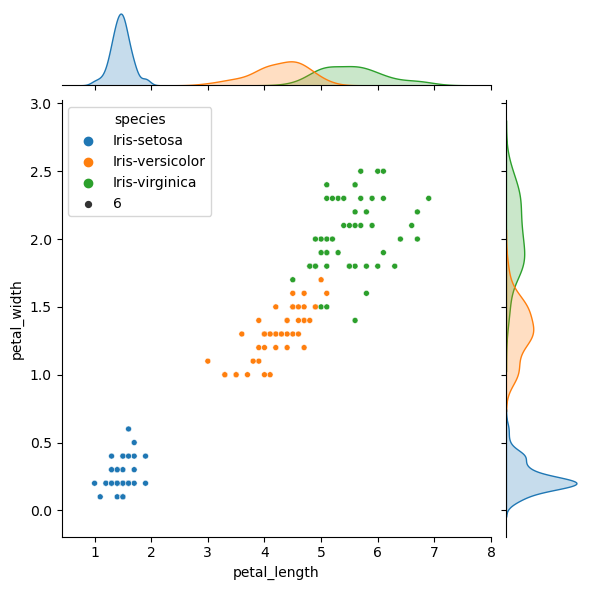

In [88]:
sns.jointplot(data=df, x="petal_length",y = "petal_width",size=6,hue = "species")
plt.show()

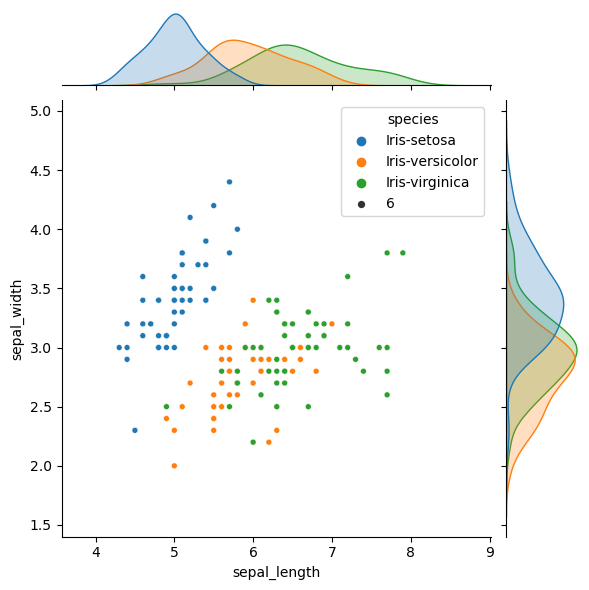

In [89]:
sns.jointplot(data=df, x="sepal_length",y = "sepal_width",size=6,hue = "species")
plt.show()

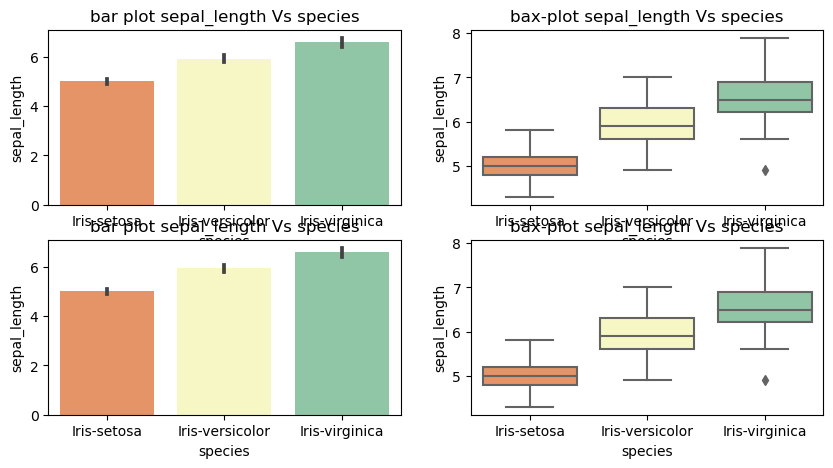

In [91]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.barplot(x="species", y="sepal_length", data=df, palette=("Spectral"))
plt.title("bar plot sepal_length Vs species")

plt.subplot(2,2,2)
sns.boxplot(x="species", y="sepal_length", data=df, palette=("Spectral"))
plt.title("bax-plot sepal_length Vs species")

plt.subplot(2,2,3)
sns.barplot(x="species", y="sepal_length", data=df, palette=("Spectral"))
plt.title("bar plot sepal_length Vs species")

plt.subplot(2,2,4)
sns.boxplot(x="species", y="sepal_length", data=df, palette=("Spectral"))
plt.title("bax-plot sepal_length Vs species")

plt.show()

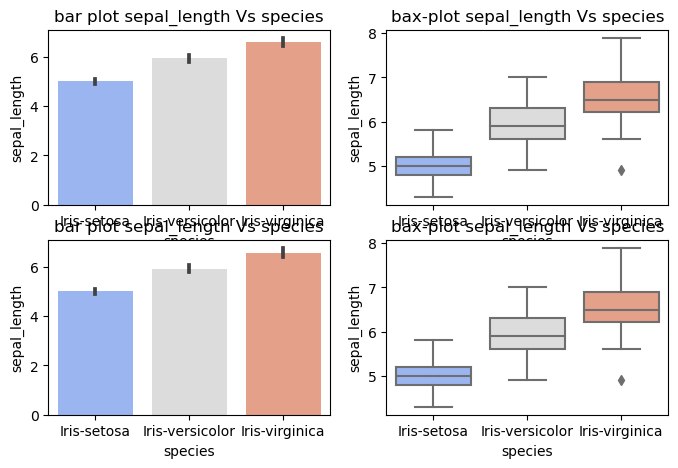

In [93]:
plt.figure(figsize=(8,5))
plt.subplot(2,2,1)
sns.barplot(x="species", y="sepal_length", data=df, palette=("coolwarm"))
plt.title("bar plot sepal_length Vs species")

plt.subplot(2,2,2)
sns.boxplot(x="species", y="sepal_length", data=df, palette=("coolwarm"))
plt.title("bax-plot sepal_length Vs species")

plt.subplot(2,2,3)
sns.barplot(x="species", y="sepal_length", data=df, palette=("coolwarm"))
plt.title("bar plot sepal_length Vs species")

plt.subplot(2,2,4)
sns.boxplot(x="species", y="sepal_length", data=df, palette=("coolwarm"))
plt.title("bax-plot sepal_length Vs species")

plt.show()

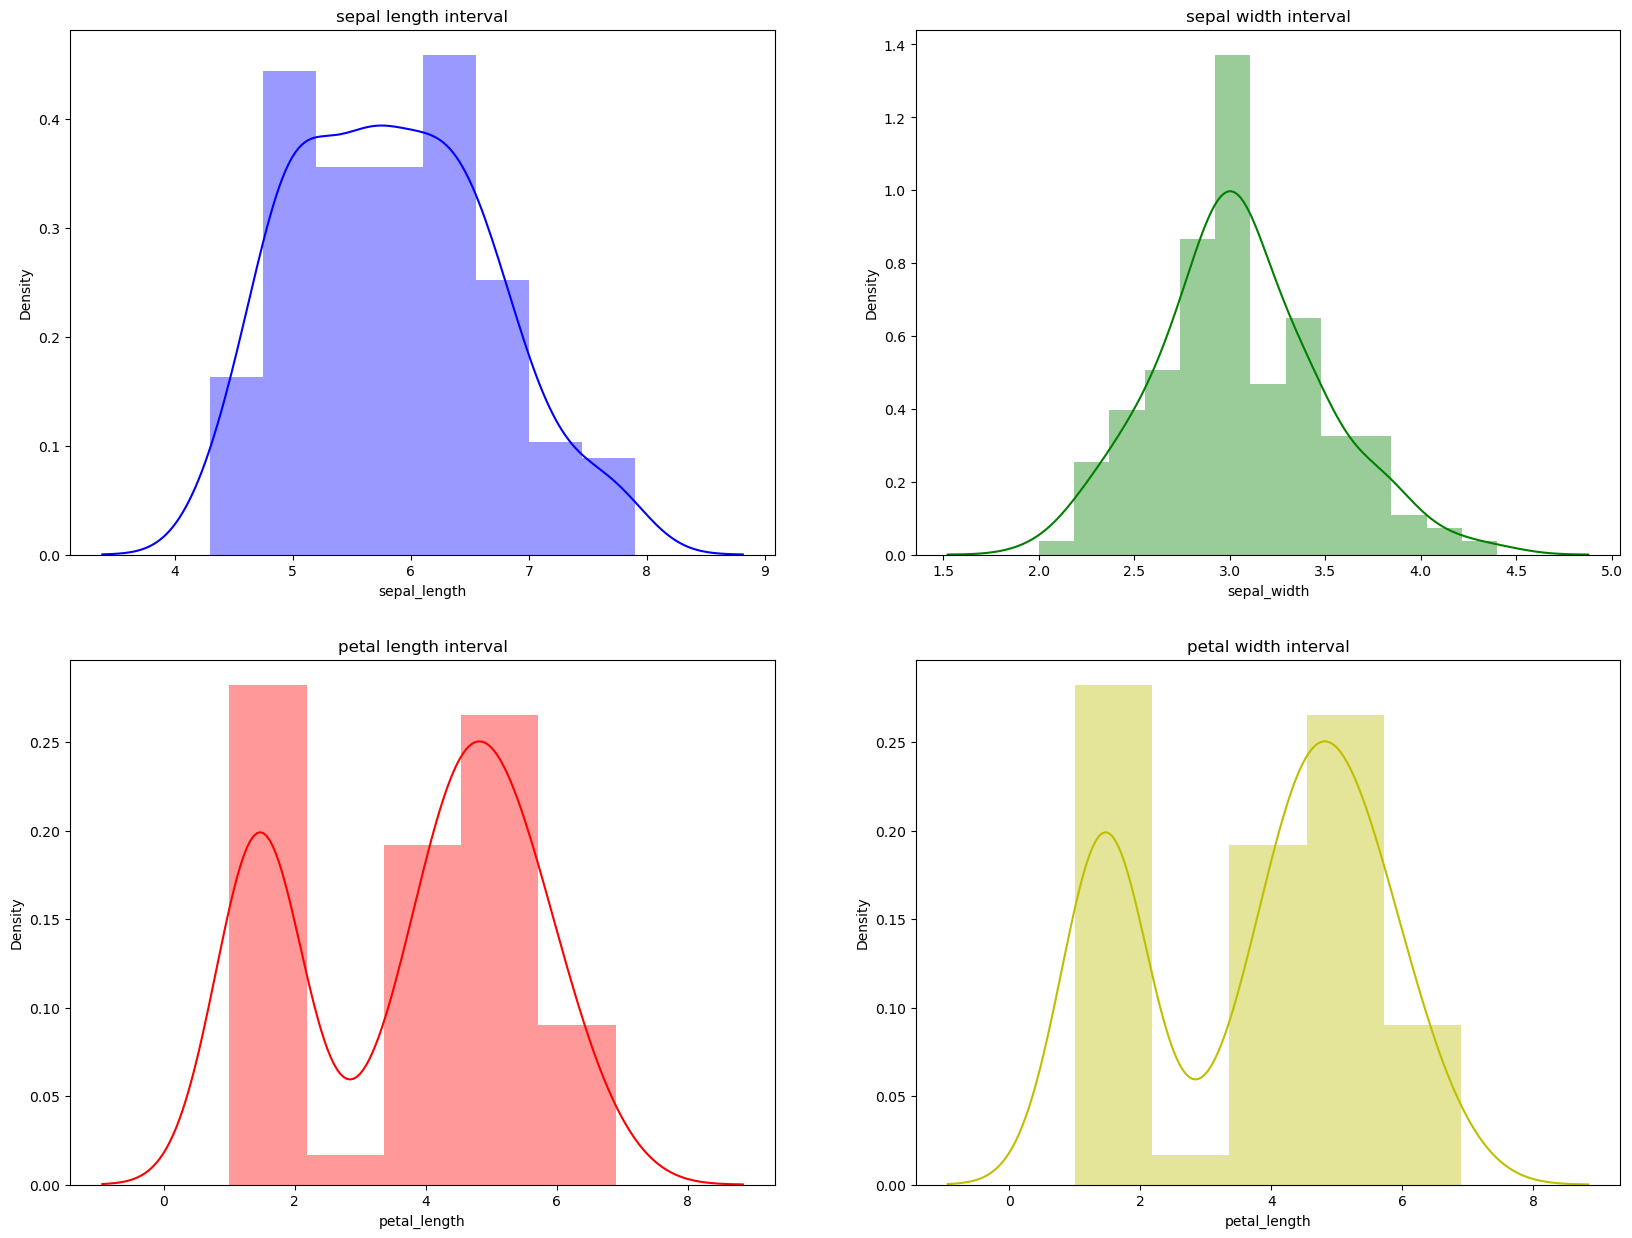

In [95]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.distplot(df["sepal_length"], color="b").set_title("sepal length interval")

plt.subplot(2,2,2)
sns.distplot(df["sepal_width"], color="g").set_title("sepal width interval")

plt.subplot(2,2,3)
sns.distplot(df["petal_length"], color="r").set_title("petal length interval")

plt.subplot(2,2,4)
sns.distplot(df["petal_length"], color="y").set_title("petal width interval")

plt.show()


# Data Cleaning

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
le= LabelEncoder()

In [98]:
df["species"]=le.fit_transform(df["species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [99]:
df["species"].unique()

array([0, 1, 2])

In [100]:
x=df.iloc[:,[0,1,2,3]]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [102]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [103]:
print(x.shape)

(150, 4)


In [104]:
print(y.shape)

(150,)


# Model Building

super vised machine learning

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [107]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# Logistic Regression


In [109]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [110]:
lr.fit(x_train, y_train)
print("Logistic regression successfully implemented")

y_pred= lr.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test,y_pred)
print("accuracy is:", accuracy*100)

print("classification_report:")
print(classification_report(y_test,y_pred))

Logistic regression successfully implemented
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is: 100.0
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Random Forest Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)
print("Random Forest Classifier Succesfully Implemented")

y_pred = rfc.predict(x_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy is:", accuracy*100)

print("classification_report:")
print(classification_report(y_test,y_pred))

Random Forest Classifier Succesfully Implemented
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is: 100.0
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(x_train,y_train)
print('decision tree algorithm in successfully implemented')

y_pred=dtree.predict(x_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy is:", accuracy*100)

print("classification_report:")
print(classification_report(y_test,y_pred))

decision tree algorithm in successfully implemented
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is: 100.0
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [112]:
from sklearn.tree import plot_tree

In [113]:
#visualizing the decision tree
feature = ['sepal_length','sepal_width','petal_length','petal_width']
classes = ['Iris-setosa','Iris-Versicolor','Iris-Virginica']

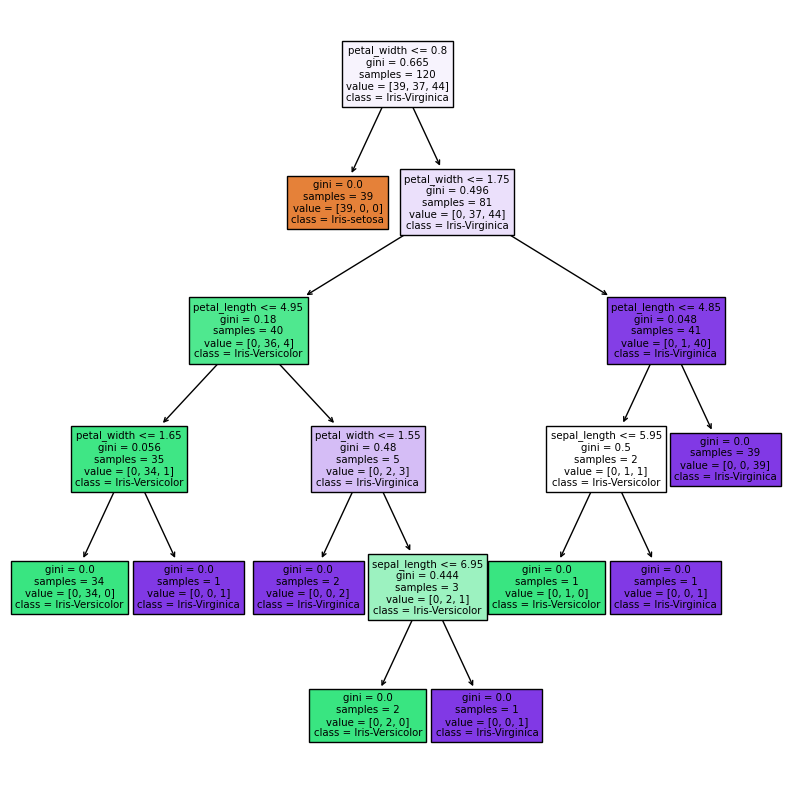

In [118]:
plt.figure(figsize=(10,10))
plot_tree(dtree, feature_names = feature, class_names=classes, filled = True);

# Support Vector Machine 

In [119]:
from sklearn.svm import SVC

In [120]:
svc= SVC()

In [122]:
svc.fit(x_train,y_train)
print("support vector classifier is successfully implemented")

y_pred = svc.predict(x_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy is:", accuracy*100)

print("classification_report:")
print(classification_report(y_test,y_pred))

support vector classifier is successfully implemented
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is: 100.0
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# K-NN Classifier


In [127]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

print("K-Nearest Neighbors classifier is successfully implemented")

y_pred = knn.predict(x_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy is:", accuracy*100)

print("classification_report:")
print(classification_report(y_test,y_pred))

K-Nearest Neighbors classifier is successfully implemented
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is: 100.0
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Naive Bayes

In [131]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print("Naive Bayes is successfully implemented")

y_pred = gnb.predict(x_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy is:", accuracy*100)

print("classification_report:")
print(classification_report(y_test,y_pred))

Naive Bayes is successfully implemented
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy is: 96.66666666666667
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



# Result


1. Accuracy of logistic regression is - 100%
2. Accuracy of Random Forest Classifier is - 100%
3. Accuracy of Decision Tree is - 100%
4. Accuracy of Support Vector Machine is - 100%
5. Accuarcy of K-NN Classifier is - 100%
6. Accuracy of Naiev Bayes is - 96.66666666666667%

The category is [0]

# THANK YOU 